In [1]:
#import packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [2]:
#read in csv
energy_data = pd.read_csv('Renewable_energy.csv',delimiter = ',')
energy_data.head()

,Company Name,Capacity,Owner,Programme,Project Name,Technology Category,Technology,Website,Location 1
0,None,40.0,All IPP,IPP 4,Aggeneys Solar Project,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,"Northern Cape\n(-29.23579, 18.89766)"
1,None,67.9,All IPP,IPP 4,Bokamoso,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,"North West\n(-27.15639, 26.39694)"
2,None,102.0,All IPP,IPP 4,Copperton Windfarm,Onshore Wind Power,Onshore Wind\n,http://www.saippa.org.za/,"Northern Cape\n(-29.9, 22.35)"
3,None,50.0,All IPP,IPP 4,De Wildt,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,"North West\n(-25.641, 27.92517)"
4,None,75.0,All IPP,IPP 4,Droogfontein 2 Solar,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,"Northern Cape\n(-28.56667, 24.73333)"


In [3]:
#.describe returns information for each column
energy_data.describe(include = 'all')

,Company Name,Capacity,Owner,Programme,Project Name,Technology Category,Technology,Website,Location 1
count,121,121.000000,121,121,121,121,121,111,121
unique,74,NaN,3,7,121,6,10,2,120
top,None,NaN,All IPP,IPP 4,Noupoort,Photovoltaic Power,Onshore Wind\n,http://www.saippa.org.za/,"Northern Cape\n(-30.60475, 24.09524)"
freq,38,NaN,106,28,1,51,37,106,2
mean,NaN,54.400909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,45.412068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,79.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#create function to convert each value in a column to a list
def remove_co_od(location):
    list_value = []
    list_value = list(location)
    for i in range(len(list_value)):
        if list_value[i]  == '\n' :
            list_value = list_value[0:i]
            return list_value

In [4]:
#function below converts lists to strings
def convert(location):
    # initialization of string to ""
    string = ""
  
    # traverse in the string 
    for x in location:
        string += x 
  
    # return string 
    return string

In [5]:
#run a loop to use the to list functon on each value
for j in range(len(energy_data)):
    energy_data['Location 1'][j] = remove_co_od(energy_data['Location 1'][j])

<ipython-input-5-ba7fa351a3d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_data['Location 1'][j] = remove_co_od(energy_data['Location 1'][j])


In [6]:
#save the modified data table under new object
new_data = energy_data

In [7]:
#run loop using the to string function on each column value
for m in range(len(new_data)):
    new_data['Location 1'][m] = convert(new_data['Location 1'][m])

<ipython-input-7-5da26e2201cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Location 1'][m] = convert(new_data['Location 1'][m])


In [10]:
#display updated datetable
new_data

,Company Name,Capacity,Owner,Programme,Project Name,Technology Category,Technology,Website,Location 1
0,None,40.00,All IPP,IPP 4,Aggeneys Solar Project,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,Northern Cape
1,None,67.90,All IPP,IPP 4,Bokamoso,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,North West
2,None,102.00,All IPP,IPP 4,Copperton Windfarm,Onshore Wind Power,Onshore Wind\n,http://www.saippa.org.za/,Northern Cape
3,None,50.00,All IPP,IPP 4,De Wildt,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,North West
4,None,75.00,All IPP,IPP 4,Droogfontein 2 Solar,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,Northern Cape
...,...,...,...,...,...,...,...,...,...
116,Umoya Energy (RF) Pty Ltd,65.40,All IPP,IPP 1,Hopefield Wind Farm,Onshore Wind Power,Onshore Wind\n,http://www.saippa.org.za/,Western Cape
117,Vredendal Solar Park (RF) Pty Ltd,8.82,All IPP,IPP 2,Vredendal Solar Park,Photovoltaic Power,Photovoltaic Crystalline Fixed\n,http://www.saippa.org.za/,Western Cape
118,Waainek Wind Power (RF) Pty Ltd,23.28,All IPP,IPP 2,Waainek Wind Power,Onshore Wind Power,Onshore Wind\n,http://www.saippa.org.za/,Eastern Cape
119,Windfall 59 Properties (RF) Pty Ltd,74.00,All IPP,IPP 2,Sishen Solar Facility,Photovoltaic Power,Photovoltaic Crystalline Tracking Single Axis\n,http://www.saippa.org.za/,Northern Cape


In [17]:
count_data = new_data.loc[new_data['Location 1'] == 'Northern Cape']
len(count_data)

51

In [11]:
#drop column with redundent data
new_data.drop('Owner', axis = 1, inplace =True)
new_data.drop('Programme', axis = 1, inplace = True)
new_data.drop('Technology',axis =1 ,inplace =True)
new_data.drop('Website',axis = 1,inplace =True)
new_data.drop('Company Name',axis = 1, inplace = True)

In [12]:
#check unique values in column 
new_data['Technology Category'].unique()

array(['Photovoltaic Power', 'Onshore Wind Power',
       'Concentrated Solar Power', 'Small Hydro Power', 'Biomass Power',
       'Landfill Gas Power'], dtype=object)

In [14]:
#display the output of .describe functon for the new datatable
new_data.describe(include = 'all')

,Capacity,Project Name,Technology Category,Location 1
count,121.000000,121,121,121
unique,NaN,121,6,9
top,NaN,Noupoort,Photovoltaic Power,Northern Cape
freq,NaN,1,51,51
mean,54.400909,NaN,NaN,NaN
std,45.412068,NaN,NaN,NaN
min,0.350000,NaN,NaN,NaN
25%,8.820000,NaN,NaN,NaN
50%,50.000000,NaN,NaN,NaN
75%,79.050000,NaN,NaN,NaN


<AxesSubplot:xlabel='count', ylabel='Location 1'>

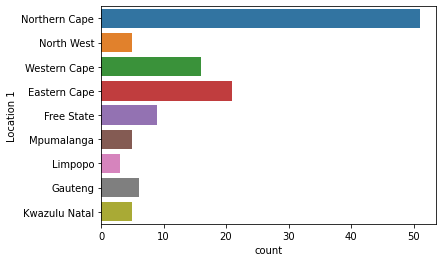

In [15]:
sns.countplot(y = new_data['Location 1'] , data = new_data)

The above bar graph shows that the Northern cape province uses the most renewable energy technologies.

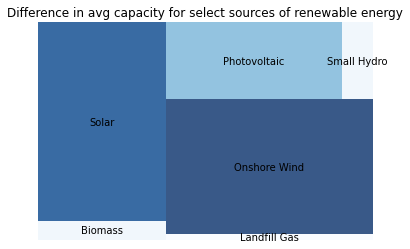

In [17]:
import squarify
import matplotlib
#had to install squarify
#had to import matplotlib for colour functions
group_by_tech = new_data.groupby(by = ['Technology Category'])
#create  group_by_manu obj to save the grouped data ,grouped by manufacturer

tech_data_avg = round(group_by_tech.mean(),0)
#created car_data_avg obj to store the avg values for each grouped manufacturer

sizes=tech_data_avg.iloc[:,0]
#set values for sizes which is the fuel tank capacity of different vehicles

label=['Biomass','Solar','Landfill Gas','Onshore Wind','Photovoltaic','Small Hydro']
#set label which is the manufacturer of different vehicles

#create a color pallete, mapped to these values
cmap = matplotlib.cm.Blues
mini = min(sizes)
maxi = max(sizes)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sizes]
#the above code uses a group of different obj to create a range for a specific colour based on the range of values in a dataset

squarify.plot(sizes=sizes, label = label, alpha=.8, color=colors )
#above code plots the information and assigns the colour

plt.title('Difference in avg capacity for select sources of renewable energy')
#set title

plt.axis('off')
plt.show()

This treemap shows that out of the six forms of renewable energy in this dataset ,the forms of renewable energy with the highest average capacity are onshore wind ,solar and photovoltaic .

Pie chart showing frequency of renewable energy use


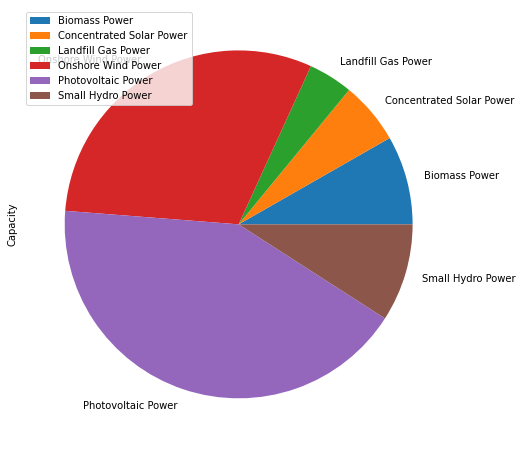

In [27]:
#plot and display a pie chart for all countries with classic wine

group_by_tech = new_data.groupby(by=['Technology Category'])

engy_count = group_by_tech.count()

engy_count = pd.DataFrame(engy_count.iloc[:,0])

engy_count.plot.pie(subplots=True,figsize=(10, 8))
print('Pie chart showing frequency of renewable energy use')

The pie chart above shows that onshore wind and photovoltaic power are the 2 most used forms of renewable energy,with landfill gas and solar power being the 2 least used forms of renewable energy in the dataset